<a href="https://colab.research.google.com/github/emilyjiminroh/2022_ai_winter_study/blob/main/CNN/MLP_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow is already loaded. Please restart the runtime to change versions.
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


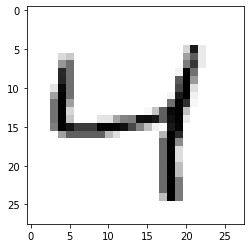

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	67	232	39	0	0	0	0	0	
0	0	0	0	62	81	0	0	0	0	0	0	0	0	0	0	0	0	0	0	120	180	39	0	0	0	0	0	
0	0	0	0	126	163	0	0	0	0	0	0	0	0	0	0	0	0	0	2	153	210	40	0	0	0	0	0	
0	0	0	0	220	163	0	0	0	0	0	0	0	0	0	0	0	0	0	27	254	162	0	0	0	0	0	0	
0	0	0	0	222	163	0	0	0	0	0	0	0	0	0	0	0	0	0	183	254	125	0	0	0	0	0	0	
0	0	0	46	245	163	0	0	0	0	0	0	0	0	0	0	0	0	0	198	254	56	0	0	0	0	0	0	
0	0	0	120	254	163	0	0	0	0	0	0	0	0	0	0	0	0	23	231	254	29	0	0	0	0	0	0	
0	0	0	159	254	120	0	0	0	0	0	0	0	0	0	0	0	0	163	254	216	16	0	0	0	0	0	0	
0	0	0	159	254	67	0	0	0	0	0	0	0	0	0	14	86	178	248	254	91	0	0	0	0	0	0	0	
0	0	0	159	254	85	0	0	0	47	49	116	144	150	241	243	234	179	241	252	40	0	0	0	0	0	0	0	
0	0	0	150	253	237	207	207	207	2

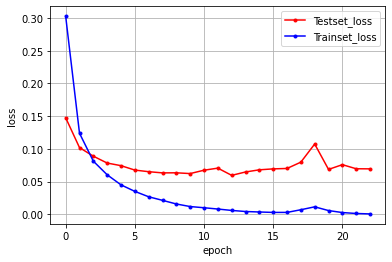

In [ ]:
!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

# seed 값 설정 (디버깅도 랜덤 값이 아닌 같은 seed로 하기 위함)
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# 그래프로 확인
plt.imshow(X_train[2], cmap='Greys') # Greys 흑백으로 출력
plt.show()

# 코드로 확인
for x in X_train[2]:
    for i in x:
        # 0~255까지의 등급을 매긴 것을 확인
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')


# 차원 변환 과정
# 1차원으로 reshape(총 샘플 수(X_train.shape[0]), 1차원 속성의 수 (28*28)) (예제 아래)
X_train = X_train.reshape(X_train.shape[0], 784)
# * 정규화 => 케라스는 0~1 사이의 값을 데이터로 변화한 뒤에 최적의 성능을 보인다.
# 정규화를 위해 255로 나누어야 함 => float64로 바꿈 
X_train = X_train.astype('float64')
X_train = X_train / 255

# test도 마찬가지로 reshape => float64 => 255 나누기
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# train 데이터 변환 확인
print(X_train[0])

# 클래스 값 확인
print("class : %d " % (Y_class_train[2]))

# 바이너리화 과정 (원-핫 인코딩 => to_categorical 함수 사용)
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[2])

# 모델 프레임 설정
model = Sequential()
# 은닉층, 노드 = 512개, 이력값 = 784개, 활성화함수 = relu
model.add(Dense(512, input_dim=784, activation='relu'))
# 출력층, 출력값 = 10개, softmax 사용
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
# 오차함수 = categorical_crossentropy, 최적화 함수 = adam
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
# 모델 저장
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
# 10회 이상의 모델 성과 향상 없으면 학습 자동 중단
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
# batch_size 200 epochs 30으로 실행 
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 오차 = 1 - 학습셋 정확도
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
# numpy.arange(n) => 0~n-1를 담은 리스트 생성 (예제 아래)
x_len = numpy.arange(len(y_loss))
# point marker 형태로 label 명을 붙인 y_vloss, y_loss 그래프를 각각 색상 다르게 생성
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()






In [ ]:
# reshape 예제)
import numpy as np

a = [[1,2],[3,4]]
a = np.reshape(a,4)
b = np.reshape(a,(2,2))
a
b

array([[1, 2],
       [3, 4]])

# normalize의 이유
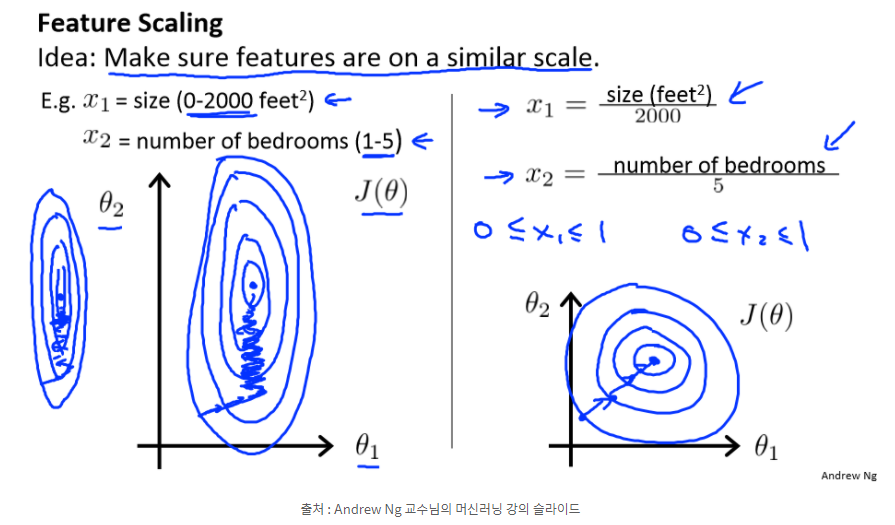

In [ ]:
# numpy.arange 예제
import numpy as np
a = np.arange(3)
a

array([0, 1, 2])


# plt.plot marker 속성값



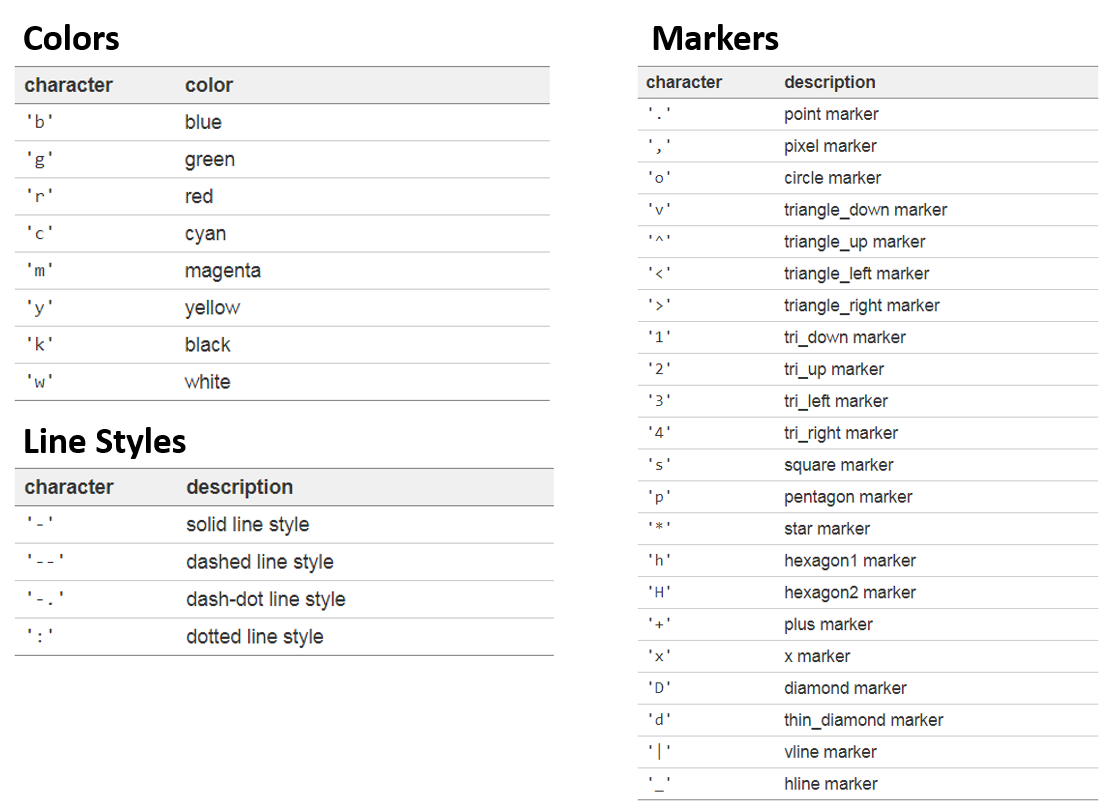

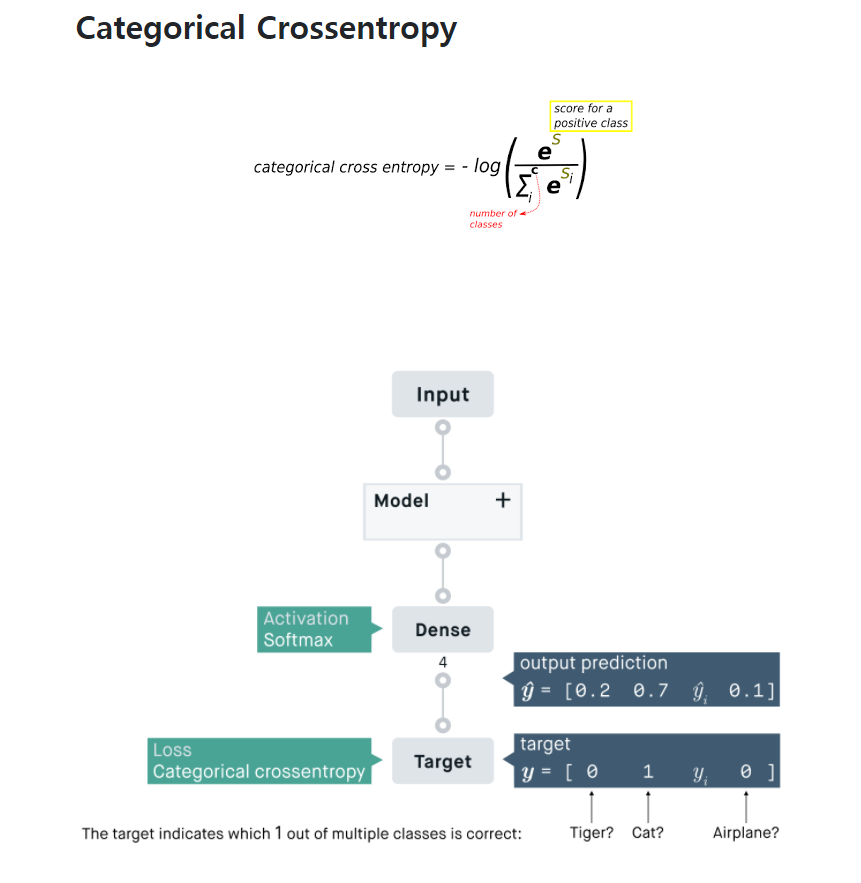

# 모델 도식 (512개의 노드로 이루어진 은닉층 하나)
## 출처. 모두의 딥러닝 p.227

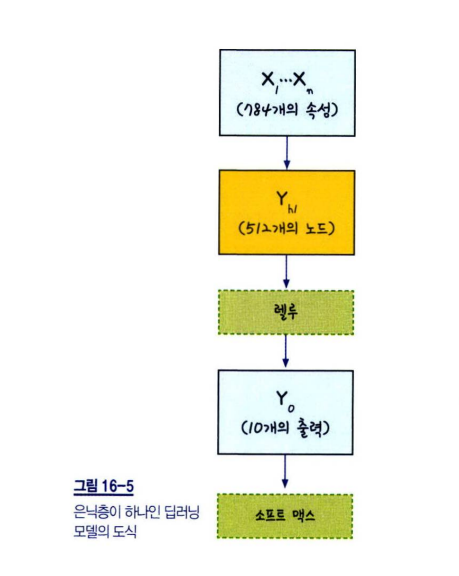